In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import nltk
import pickle
import numpy as np

#Preprocessing
from utils import pipeline_v1e
nltk.download('punkt_tab')
from nltk.tokenize import PunktSentenceTokenizer



#Feature extraction
from sklearn.feature_extraction.text import CountVectorizer

#Sentiment Analysis with VADER
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#Sentiment Analysis with TextBlob
%pip install textblob
from textblob import TextBlob

#Regression Metrics
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# %pip install wordcloud
from wordcloud import WordCloud

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: cannot import name 'pipeline_v1e' from 'utils' (C:\Users\karom\miniconda3\envs\text-mining1\lib\site-packages\utils\__init__.py)

In [5]:
df = pd.read_csv("reviews_subset.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'reviews_subset.csv'

In [6]:
df

NameError: name 'df' is not defined

In [7]:
df = df.dropna()
# df.info()
df.info()

NameError: name 'df' is not defined

In [8]:

#instance the vectoriser and the word cloud generator
onegram_bow_vectorizer = CountVectorizer(ngram_range=(1,1), token_pattern=r"(?u)\b\w+\b")
wc = WordCloud(background_color="white",max_words=120, width = 220,height = 220, color_func=lambda *args, **kwargs: (0,0,0))

In [9]:
df_bow_td_matrix = onegram_bow_vectorizer.fit_transform(df["Review"]).toarray()
df["initial_bow_vector"] = df_bow_td_matrix.tolist()
df_bow_word_list = onegram_bow_vectorizer.get_feature_names_out()

df_raw_vocabulary = pipeline_v1e.word_freq_calculator(df_bow_td_matrix,df_bow_word_list, df_output=False)
# wc.generate_from_frequencies(df_raw_vocabulary)
# wc.to_image()


C:\Users\karom\AppData\Local\Temp\ipykernel_6196\2587502526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["initial_bow_vector"] = df_bow_td_matrix.tolist()


In [10]:
df_bow_td_matrix.shape 
#(9955 - liczba dokumentów, 15104 - liczba wszystkich słów) dla (1,1) gram
# (9955, 171528) dla (1,2) gram

(9955, 15104)

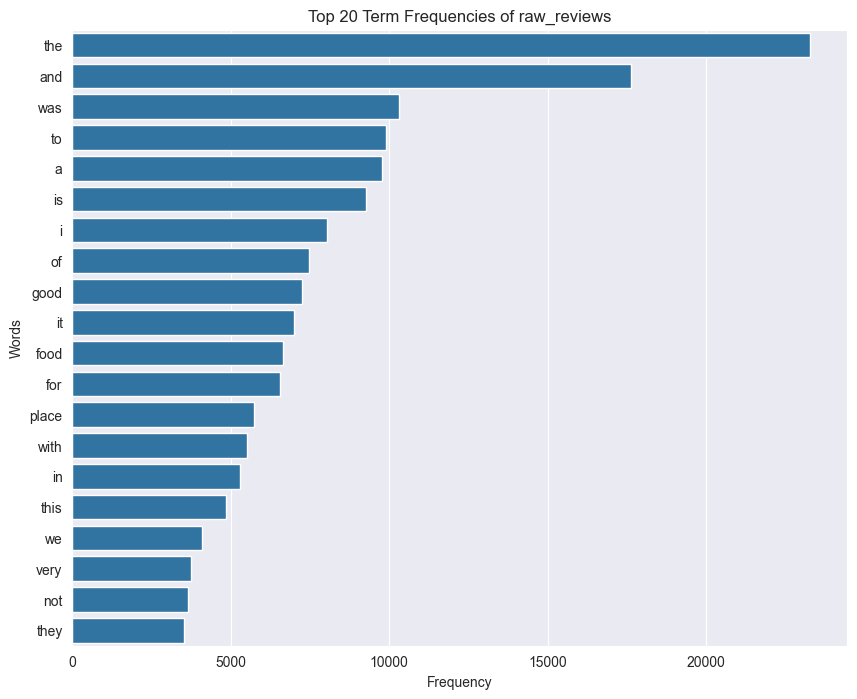

In [11]:
df_raw_vocabulary_df = pipeline_v1e.word_freq_calculator(df_bow_td_matrix,df_bow_word_list, df_output=True)
pipeline_v1e.plot_term_frequency(df_raw_vocabulary_df, 20, "raw_reviews", show=False)

In [3]:
nltk.sentiment.vader.__file__

AttributeError: module 'nltk' has no attribute 'sentiment'

In [13]:
lexicon_file_path = "sentiment/vader_lexicon.zip/vader_lexicon/vader_lexicon.txt"

lexicon_file_content = nltk.data.load(lexicon_file_path)

filename = "data/vader_lexicon_dump_project_base.txt"
with open(filename, "w", encoding="utf-8") as file_object:
    file_object.write(lexicon_file_content)

In [14]:
df["preproc_content"] =\
      df["Review"].map(lambda content : pipeline_v1e.main_pipeline(content,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    no_punctuation=False
                                                                                    ))


C:\Users\karom\AppData\Local\Temp\ipykernel_6196\1918382548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["preproc_content"] =\


In [15]:
sent_tokenizer = PunktSentenceTokenizer()

In [16]:
df["preproc_sentences"] =\
      df["Review"].map(lambda content : [pipeline_v1e.main_pipeline(sentence,
                                                                                    print_output=False,
                                                                                    no_stopwords=False,
                                                                                    lowercase=False,
                                                                                    lemmatized=False,
                                                                                    no_punctuation=False
                                                                                    ) for sentence in sent_tokenizer.tokenize(content)])

C:\Users\karom\AppData\Local\Temp\ipykernel_6196\1803658944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["preproc_sentences"] =\


In [17]:
df

,Review,Processed_Review,Rating,initial_bow_vector,preproc_content,preproc_sentences
0,"The ambience was good, food was quite good . h...","The ambience was good, food was quite good . h...",5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","The ambience was good, food was quite good . h...","[The ambience was good, food was quite good., ..."
1,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening. S...,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ambience is too good for a pleasant evening . ...,"[Ambience is too good for a pleasant evening.,..."
2,A must try.. great food great ambience. Thnx f...,A must try.. great food great ambience. Thnx f...,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",A must try .. great food great ambience . Thnx...,"[A must try .. great food great ambience., Thn..."
3,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy. Only beca...,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Soumen das and Arun was a great guy . Only bec...,"[Soumen das and Arun was a great guy., Only be..."
4,Food is good.we ordered Kodi drumsticks and ba...,Food is good.we ordered Kodi drumsticks and ba...,5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...
...,...,...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,Madhumathi Mahajan Well to start with nice cou...,3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Madhumathi Mahajan Well to start with nice cou...,[Madhumathi Mahajan Well to start with nice co...
9996,This place has never disappointed us.. The foo...,This place has never disappointed us.. The foo...,4.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",This place has never disappointed us .. The fo...,[This place has never disappointed us .. The f...
9997,"Bad rating is mainly because of ""Chicken Bone ...","Bad rating is mainly because of ""Chicken Bone ...",1.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Bad rating is mainly because of ""Chicken Bone ...","[Bad rating is mainly because of ""Chicken Bone..."
9998,I personally love and prefer Chinese Food. Had...,I personally love and prefer Chinese Food. Had...,4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",I personally love and prefer Chinese Food . Ha...,"[I personally love and prefer Chinese Food., H..."


In [18]:
vader = SentimentIntensityAnalyzer()

In [19]:
ex = "I love winter!!!"
vader.polarity_scores(ex)

{'neg': 0.0, 'neu': 0.165, 'pos': 0.835, 'compound': 0.7249}

In [20]:
sent_compound_list = []

for sentence in df["Review"]:
    sent_polarity = vader.polarity_scores(sentence)
    sent_compound_list.append(sent_polarity["compound"])
    # print("{} : \n {}".format(sentence, sent_polarity))

In [21]:
scratch_df = pd.DataFrame({"Sentences": [sentence for sentence in df["Review"]],
                           "Compound_Score": sent_compound_list})
scratch_df.describe()

,Compound_Score
count,9955.000000
mean,0.473325
std,0.583278
min,-0.994200
25%,0.000000
50%,0.764900
75%,0.933700
max,0.999600


In [24]:
df["Rating"].describe()

count     9955
unique      10
top          5
freq      3826
Name: Rating, dtype: object

In [26]:
print(df["Rating"].dtype)
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
print(df["Rating"].dtype)


object
float64


C:\Users\karom\AppData\Local\Temp\ipykernel_6196\3461868677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")


In [27]:
df["Rating"].describe()

count    9954.000000
mean        3.600261
std         1.483573
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [28]:
test_review_polarity = vader.polarity_scores(df['Review'].loc[1])
test_review_polarity

{'neg': 0.0, 'neu': 0.554, 'pos': 0.446, 'compound': 0.936}

In [29]:
df['Rating'].loc[1]

5.0

In [30]:
scratch_df

,Sentences,Compound_Score
0,"The ambience was good, food was quite good . h...",0.9664
1,Ambience is too good for a pleasant evening. S...,0.9360
2,A must try.. great food great ambience. Thnx f...,0.9186
3,Soumen das and Arun was a great guy. Only beca...,0.8591
4,Food is good.we ordered Kodi drumsticks and ba...,0.9201
...,...,...
9950,Madhumathi Mahajan Well to start with nice cou...,0.9923
9951,This place has never disappointed us.. The foo...,0.9579
9952,"Bad rating is mainly because of ""Chicken Bone ...",0.9785
9953,I personally love and prefer Chinese Food. Had...,0.9359


In [34]:
sent_compound_list

[0.9664,
 0.936,
 0.9186,
 0.8591,
 0.9201,
 0.9565,
 0.7264,
 0.2329,
 0.9638,
 0.9831,
 0.9359,
 0.9737,
 0.8976,
 0.7964,
 -0.4882,
 0.5256,
 0.8442,
 0.9485,
 0.9423,
 0.7496,
 0.9901,
 -0.1303,
 0.8768,
 0.9734,
 0.9493,
 0.9403,
 0.8885,
 0.9524,
 0.9817,
 -0.1531,
 -0.3471,
 0.9431,
 0.8122,
 0.9738,
 0.9677,
 0.9446,
 0.6801,
 0.8885,
 0.9766,
 0.6478,
 0.9622,
 0.9694,
 0.7717,
 0.9917,
 0.9331,
 0.0258,
 0.9439,
 0.9837,
 0.9846,
 0.928,
 0.9022,
 0.659,
 0.8658,
 0.92,
 0.9604,
 0.7003,
 0.9562,
 0.9409,
 0.9673,
 0.8189,
 0.9379,
 0.9689,
 0.8714,
 0.6997,
 0.9246,
 0.9148,
 -0.431,
 0.9505,
 0.9863,
 0.8932,
 0.7964,
 0.9726,
 0.8883,
 0.992,
 0.9833,
 -0.9194,
 0.5574,
 0.9651,
 0.9794,
 0.3471,
 -0.8625,
 0.9648,
 0.854,
 -0.7554,
 0.4096,
 0.9427,
 0.9421,
 0.9477,
 0.9183,
 -0.6961,
 0.7351,
 -0.3919,
 -0.2885,
 0.1139,
 0.959,
 -0.8683,
 0.8832,
 0.6369,
 -0.9137,
 0.0,
 0.9693,
 0.9182,
 0.9148,
 0.926,
 0.9274,
 0.0,
 0.9451,
 0.9429,
 0.9337,
 0.9201,
 0.9349,
 0.5

In [35]:
df["Compound_Score"] = sent_compound_list
df[["Review", "Rating", "Compound_Score"]]

C:\Users\karom\AppData\Local\Temp\ipykernel_6196\3050469612.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Compound_Score"] = sent_compound_list


,Review,Rating,Compound_Score
0,"The ambience was good, food was quite good . h...",5.0,0.9664
1,Ambience is too good for a pleasant evening. S...,5.0,0.9360
2,A must try.. great food great ambience. Thnx f...,5.0,0.9186
3,Soumen das and Arun was a great guy. Only beca...,5.0,0.8591
4,Food is good.we ordered Kodi drumsticks and ba...,5.0,0.9201
...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,3.0,0.9923
9996,This place has never disappointed us.. The foo...,4.5,0.9579
9997,"Bad rating is mainly because of ""Chicken Bone ...",1.5,0.9785
9998,I personally love and prefer Chinese Food. Had...,4.0,0.9359


In [36]:
# normalized_rating = (rating - 3)/2
df = df[df['Rating'] != 'Like']
df['Normalized_rating'] = (df['Rating'].astype(float) - 3) / 2
# df[["Review", "Normalized_rating", "Compound_Score"]]
df

,Review,Processed_Review,Rating,initial_bow_vector,preproc_content,preproc_sentences,Compound_Score,Normalized_rating
0,"The ambience was good, food was quite good . h...","The ambience was good, food was quite good . h...",5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","The ambience was good, food was quite good . h...","[The ambience was good, food was quite good., ...",0.9664,1.00
1,Ambience is too good for a pleasant evening. S...,Ambience is too good for a pleasant evening. S...,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Ambience is too good for a pleasant evening . ...,"[Ambience is too good for a pleasant evening.,...",0.9360,1.00
2,A must try.. great food great ambience. Thnx f...,A must try.. great food great ambience. Thnx f...,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",A must try .. great food great ambience . Thnx...,"[A must try .. great food great ambience., Thn...",0.9186,1.00
3,Soumen das and Arun was a great guy. Only beca...,Soumen das and Arun was a great guy. Only beca...,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Soumen das and Arun was a great guy . Only bec...,"[Soumen das and Arun was a great guy., Only be...",0.8591,1.00
4,Food is good.we ordered Kodi drumsticks and ba...,Food is good.we ordered Kodi drumsticks and ba...,5.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Food is ordered Kodi drumsticks and basket mut...,[Food is ordered Kodi drumsticks and basket mu...,0.9201,1.00
...,...,...,...,...,...,...,...,...
9995,Madhumathi Mahajan Well to start with nice cou...,Madhumathi Mahajan Well to start with nice cou...,3.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Madhumathi Mahajan Well to start with nice cou...,[Madhumathi Mahajan Well to start with nice co...,0.9923,0.00
9996,This place has never disappointed us.. The foo...,This place has never disappointed us.. The foo...,4.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",This place has never disappointed us .. The fo...,[This place has never disappointed us .. The f...,0.9579,0.75
9997,"Bad rating is mainly because of ""Chicken Bone ...","Bad rating is mainly because of ""Chicken Bone ...",1.5,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","Bad rating is mainly because of ""Chicken Bone ...","[Bad rating is mainly because of ""Chicken Bone...",0.9785,-0.75
9998,I personally love and prefer Chinese Food. Had...,I personally love and prefer Chinese Food. Had...,4.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",I personally love and prefer Chinese Food . Ha...,"[I personally love and prefer Chinese Food., H...",0.9359,0.50


In [37]:
df = df.dropna()
df_corr = df[["Normalized_rating", "Compound_Score"]]

correlation = df_corr.corr().iloc[0, 1]  # Korelacja między compound a rating
correlation

0.7034259726006592

In [51]:
correlation = df_corr.corr(method="spearman").iloc[0, 1]  # Korelacja między compound a rating
correlation

0.5714519557901118

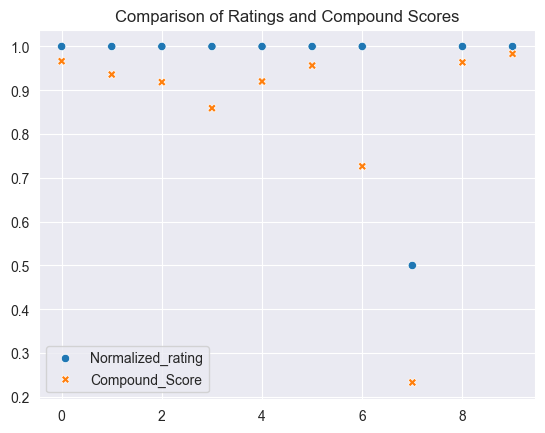

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

df_plot10 = df_corr.head(10)
sns.scatterplot(data=df_plot10)
# sns.scatterplot(data=df_corr, x='Normalized_rating', y='Compound_Score')
# plt.xlabel('Normalized Rating')
# plt.ylabel('Compound Score')
plt.title('Comparison of Ratings and Compound Scores')
plt.show()



In [43]:
df["Normalized_rating"] = pd.to_numeric(df["Normalized_rating"], errors="coerce")
df["Compound_Score"] = pd.to_numeric(df["Compound_Score"], errors="coerce")

#policz błąd MSE pomiędzy kazdym i zwroc które sa najbardziej oddalone
df["MSE"] = (df["Normalized_rating"] - df["Compound_Score"])**2

C:\Users\karom\AppData\Local\Temp\ipykernel_6196\1728562768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Normalized_rating"] = pd.to_numeric(df["Normalized_rating"], errors="coerce")
C:\Users\karom\AppData\Local\Temp\ipykernel_6196\1728562768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Compound_Score"] = pd.to_numeric(df["Compound_Score"], errors="coerce")
C:\Users\karom\AppData\Local\Temp\ipykernel_6196\1728562768.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy o

In [45]:
df_sorted = df.sort_values(by="MSE", ascending=False)

                                                 Review  \
585   Fisherman's wharf used to be our fav joint whe...   
7429  Zomato has asked me to be polite.. ok.. Faasos...   
6142  It really been long time I have visited this p...   
4515  Place located just opposite of DLF gate no 3, ...   
3702  A complete and absolute disaster. The place wh...   
...                                                 ...   
6384                                         very spicy   
7583  food was not cooked....half fried chicken lolipop   
6427  Decent place near DLF! Their fry piece chicken...   
7544                                            average   
4010  Food is okay..but the behaviour of staff is un...   

                                       Processed_Review  Rating  \
585   Fisherman's wharf used to be our fav joint whe...     1.0   
7429  Zomato has asked me to be polite.. ok.. Faasos...     1.0   
6142  It really been long time I have visited this p...     1.0   
4515  Place located jus

In [49]:
df_sorted[["Review", "Rating", "Compound_Score", "MSE"]]

for _, row in df_sorted.head(20).iterrows():  # `iterrows` zwraca indeks i dane wiersza
    print(f"Review: {row['Review']}")
    print(f"Rating: {row['Rating']}")
    print(f"Compound Score: {row['Compound_Score']}")
    print(f"MSE: {row['MSE']}")
    print("-" * 50)  # Separator między wierszami


Review: Fisherman's wharf used to be our fav joint when we lived in Goa. Excellent food and bevs.
Then we moved to Hyderabad, FMW followed.
We were so happy, to have a Goan restaurant just 5 min drive from home.
In the beginning it was great place to dine. Then it started getting local. Fishes started getting stale, fewer varieties ..Not so great.
Now , after about 3 years, it's more a typical curry point.
We ordered Mutton Xacuti and Kingfish Richado.
Fish was so firm and overcooked, richado overloaded with sweetness.
Mutton was out of the world, with heaps of Curry leaves(Kadi patta/Karia paku) , super high on heat....Reminded me of a Rayala curry in Dindi (Godavari distt ). Meat was cooked with extra affection that it took me 5 min to chew it like a bubblegum. I really thank myself for not ordering more.
Fisherman's wharf- such a disappointment.
Rating: 1.0
Compound Score: 0.9863
MSE: 3.94538769
--------------------------------------------------
Review: Zomato has asked me to be pol

In [40]:
df[["Review", "Rating", "Compound_Score"]].loc[6]

Review            Its a very nice place, ambience is different, ...
Rating                                                          5.0
Compound_Score                                               0.7264
Name: 6, dtype: object

In [39]:
df[["Review", "Rating", "Compound_Score"]].loc[7]

Review            Well after reading so many reviews finally vis...
Rating                                                          4.0
Compound_Score                                               0.2329
Name: 7, dtype: object